# Wind Turbines in the USA

Import the necessary libraries

In [355]:
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go

from IPython.display import Image

In [356]:
plotly.offline.init_notebook_mode(connected=True)

Data was downloaded from https://www.nature.com/articles/sdata201560

In [357]:
df_data = pd.read_csv('windata.csv')

Start by inspecting the data

In [358]:
print(type(df_data))

<class 'pandas.core.frame.DataFrame'>


In [359]:
df_data.head(3)

,xFID,unique_id,site_name,total_turb,on_year,year_range,on_year_s,manufac,model,type_tower,...,conf_attr,conf_loc,WENDI_name,EIA_name,FAA_jdate,FAA_AGL,FAA_ORS,image_name,image_year,comments
0,0,982,unknown Gilliam County,2,unknown,unknown,-99999,unknown,unknown,unknown,...,0,0,unknown,unknown,2013192,124.09,41-020577,Bing Maps Aerial,unknown,"FAA lists as Dismantle, google temporal analys..."
1,1,1065,unknown Gilliam County,2,unknown,unknown,-99999,unknown,unknown,unknown,...,0,0,unknown,unknown,2013192,124.09,41-020578,Bing Maps Aerial,unknown,"FAA lists as Dismantle, google temporal analys..."
2,2,1895,Banner Wind Project,2,2008,no,2008,Entegrity,EW50,trestle,...,2,2,Banner Wind Project,unknown,2009065,38.72,02-020064,Bing Maps Aerial,unknown,"trestle turbines removed, new monopoles instal..."


`df_data.info()` shows information about the data types and entries within the columns 

In [360]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48976 entries, 0 to 48975
Data columns (total 32 columns):
xFID          48976 non-null int64
unique_id     48976 non-null int64
site_name     48976 non-null object
total_turb    48976 non-null int64
on_year       48976 non-null object
year_range    48976 non-null object
on_year_s     48976 non-null int64
manufac       48976 non-null object
model         48976 non-null object
type_tower    48976 non-null object
decommiss     48976 non-null object
MW_turbine    48976 non-null float64
total_cpcy    48976 non-null float64
total_ht      48976 non-null float64
tower_h       48976 non-null float64
blade_l       48976 non-null float64
rotor_dia     48976 non-null float64
rotor_s_a     48976 non-null float64
lat_DD        48976 non-null float64
long_DD       48976 non-null float64
state         48976 non-null object
county        48976 non-null object
conf_attr     48976 non-null int64
conf_loc      48976 non-null int64
WENDI_name    48976 non-

In [361]:
df_data.columns

Index(['xFID', 'unique_id', 'site_name', 'total_turb', 'on_year', 'year_range',
       'on_year_s', 'manufac', 'model', 'type_tower', 'decommiss',
       'MW_turbine', 'total_cpcy', 'total_ht', 'tower_h', 'blade_l',
       'rotor_dia', 'rotor_s_a', 'lat_DD', 'long_DD', 'state', 'county',
       'conf_attr', 'conf_loc', 'WENDI_name', 'EIA_name', 'FAA_jdate',
       'FAA_AGL', 'FAA_ORS', 'image_name', 'image_year', 'comments'],
      dtype='object')

In [362]:
df_data.state.unique()

array(['OR', 'AK', 'CA', 'CO', 'HI', 'KS', 'MN', 'PA', 'TX', 'WI', 'WY',
       'NY', 'AZ', 'DE', 'IA', 'ID', 'IL', 'IN', 'MA', 'MD', 'ME', 'MI',
       'MO', 'MT', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 'RI',
       'SD', 'TN', 'UT', 'VT', 'WA', 'WV', 'FL', 'NC'], dtype=object)

In [363]:
df_data.manufac.unique()

array(['unknown', 'Entegrity', 'Vestas', 'Zond', 'Windmaster', 'Kenetech',
       'Howden', 'Bonus', 'Enertech', 'NEG Micon', 'Windmatic', 'Polenko',
       'Danwin', 'Nordtank', 'Flowind', 'Mitsubishi', 'Enron', 'Tacke',
       'Boeing', 'GE', 'Suzlon', 'Siemens', 'REpower',
       'Northern Power Systems', 'EWT', 'Seaforth Energy', 'Gamesa',
       'W.E.G.', 'Clipper', 'Windspire Energy', 'AAER', 'Alstrom', 'AWE',
       'Nordex', 'Westinghouse', 'Bergey Energy', 'HZ Windpower',
       'Goldwind', 'Wind World', 'Acciona', 'Vensys',
       'Emergya Wind Technologies', 'Aeronautica', 'PowerWind', 'Nordic',
       'Endurance', 'Skystream', 'Kenersys', 'Elecon', 'Sinovel',
       'Fuhrlander', 'Sany', 'Hyundai Heavy Industries',
       'Wind Energy Solutions', 'UMPI', 'DeWind', 'Unison',
       'Silver Eagle', 'Leitwind', 'Evance', 'Turbowind', 'BHD',
       'Samsung', 'ECO', 'China Creative Wind', 'Xzeres',
       'Atlantic Orient', 'Bora', 'Harbec', 'Siva',
       'Guodain United Power

### Next, we count the number of wind turbines by state by creating a new data frame

In [364]:
df_count = df_data.state.value_counts()
df_count.head()

CA    14524
TX     8012
IA     3230
IL     2218
MN     2155
Name: state, dtype: int64

In [365]:
df_countf = pd.DataFrame(count)
df_countf.index.name = 'State'
df_countf.columns = ['count']
df_countf.head()

,count
State,
CA,14524
TX,8012
IA,3230
IL,2218
MN,2155


### We must make a folder "images"  to save the graph files as images

In [366]:
import os
if not os.path.exists('images'):
    os.mkdir('images')

In [367]:
import plotly.io as pio

In [413]:
count_plot_data = [
    go.Bar(
        x = countf.index,
        y = countf['count'],
        marker=dict(
            color= 'rgb(138, 219, 203)',
            opacity=0.5,
            line=dict(
                color='rgb(28, 71, 62)',
                width=1.5
            )
        )
    )]

count_plot_layout = go.Layout(
        title = 'US Wind Turbines by State<br>(log scale)',
        yaxis = dict(type='log')
            )
plot_object = go.Figure(count_plot_data, count_plot_layout)

In [414]:
bar_chart_image = pio.to_image(plot_object, format='png', width=900, scale=1.5)

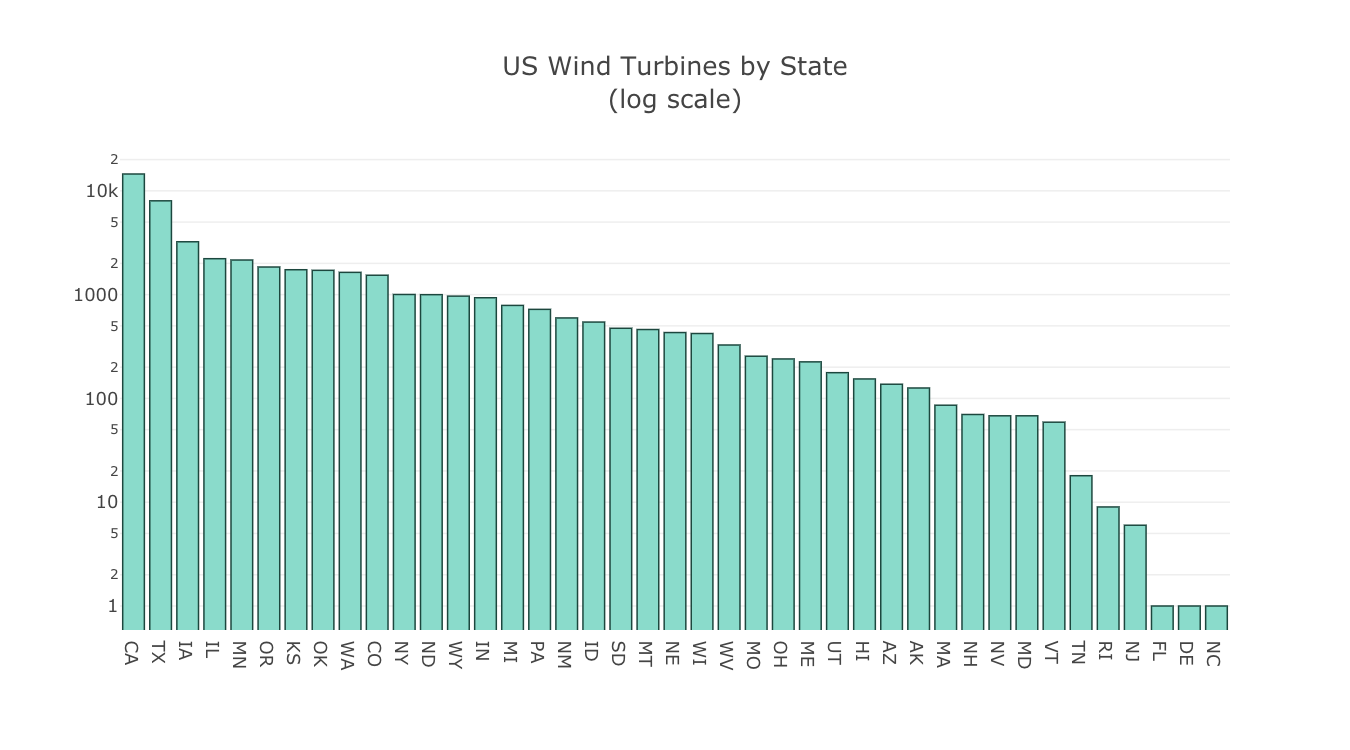

In [415]:
Image(bar_chart_image)

### Finally, we create a map of all the wind turbines in the USA using the original data frame

In [392]:
map_data = [ go.Scattergeo(
        lon = list(df_data['long_DD']),
        lat = list(df_data['lat_DD']),
        text = list(df_data['site_name'] + ', ' + df_data['state']),
        mode='markers',
        marker=dict(
            color = "rgb(138, 219, 203)",
            size=4,
            opacity=0.8,
            line = dict(
                color = "rgb(28, 71, 62)",
                width = 0.2   
            )
        )    
    )]

map_layout = go.Layout(
        title = 'USA Wind Turbines',
        geo = dict(
            scope = 'usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5            
        )
    )

In [393]:
map_object = dict(data=map_data, layout=map_layout)

In [394]:
map_image = pio.to_image(map_object, format='png', width=900, scale=1.5)

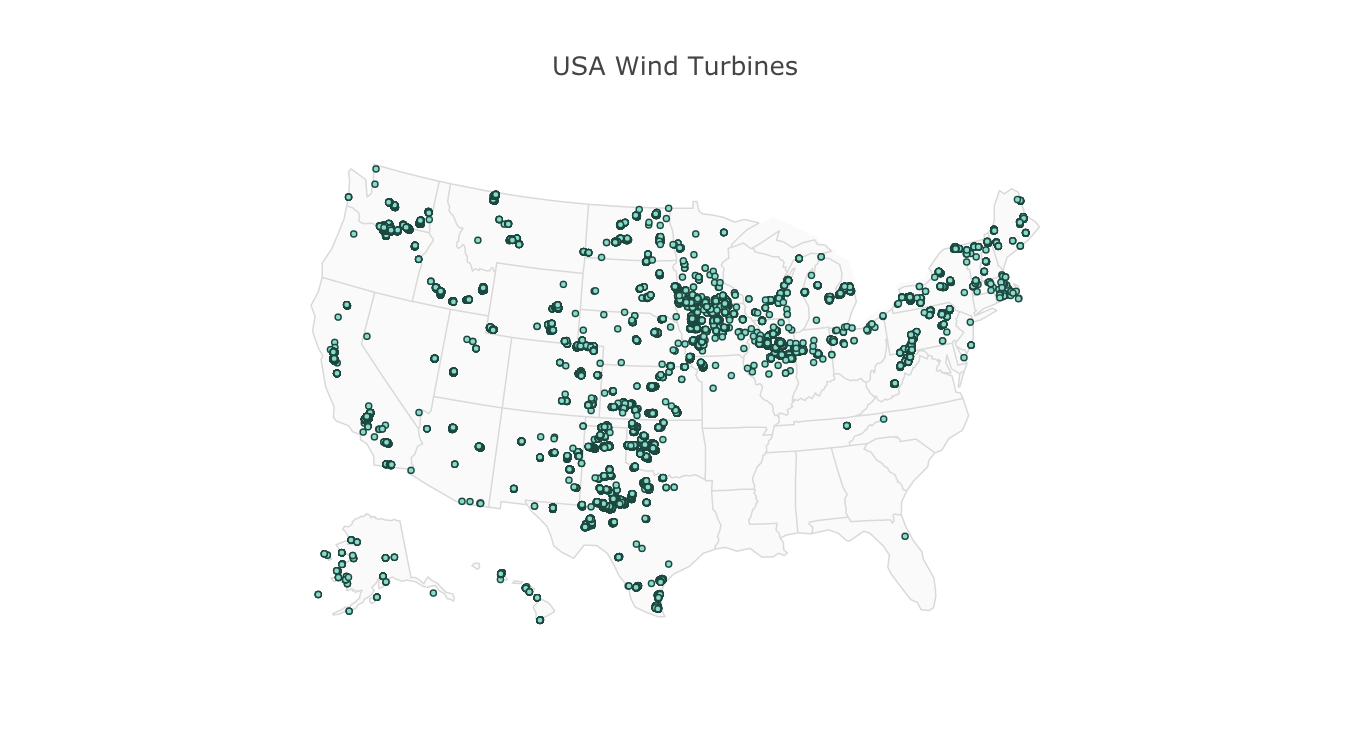

In [395]:
Image(map_image)